In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler




In [2]:
train_data = pd.read_csv('Train2.csv')
test_data = pd.read_csv('Test2.csv')


In [3]:
pd.set_option('display.max_columns', None)


train_data

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3.6_months_late,Count_6.12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
2,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
3,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1
4,1.000,24829,118400,0.0,0.0,0.0,99.05,11,B,Urban,7500,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53231,0.994,20445,186830,0.0,0.0,0.0,99.67,5,A,Urban,18000,1
53232,0.118,22275,195070,0.0,0.0,0.0,99.25,11,A,Urban,9600,1
53233,0.033,18265,301540,0.0,0.0,0.0,99.89,4,A,Rural,13800,1
53234,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,9600,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53236 entries, 0 to 53235
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  53236 non-null  float64
 1   age_in_days                       53236 non-null  int64  
 2   Income                            53236 non-null  int64  
 3   Count_3.6_months_late             53172 non-null  float64
 4   Count_6.12_months_late            53172 non-null  float64
 5   Count_more_than_12_months_late    53172 non-null  float64
 6   application_underwriting_score    51260 non-null  float64
 7   no_of_premiums_paid               53236 non-null  int64  
 8   sourcing_channel                  53236 non-null  object 
 9   residence_area_type               53236 non-null  object 
 10  premium                           53236 non-null  int64  
 11  renewal                           53236 non-null  int64  
dtypes: f

In [6]:
train_data.dtypes

perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3.6_months_late               float64
Count_6.12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
premium                               int64
renewal                               int64
dtype: object

In [7]:
train_data.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3.6_months_late                 64
Count_6.12_months_late                64
Count_more_than_12_months_late        64
application_underwriting_score      1976
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
dtype: int64

In [5]:
label_encoder = LabelEncoder()

object_cols = train_data.select_dtypes(include=['object']).columns

# تبدیل هر ستون object به مقادیر عددی
for col in object_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

train_data


,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3.6_months_late,Count_6.12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,0.429,12058,355060,0.0,0.0,0.0,99.02,13,2,1,3300,1
1,0.917,17531,84140,2.0,3.0,1.0,98.69,7,2,0,3300,0
2,0.049,15341,250510,0.0,0.0,0.0,99.57,9,0,1,9600,1
3,0.052,31400,198680,0.0,0.0,0.0,99.87,12,1,1,9600,1
4,1.000,24829,118400,0.0,0.0,0.0,99.05,11,1,1,7500,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53231,0.994,20445,186830,0.0,0.0,0.0,99.67,5,0,1,18000,1
53232,0.118,22275,195070,0.0,0.0,0.0,99.25,11,0,1,9600,1
53233,0.033,18265,301540,0.0,0.0,0.0,99.89,4,0,0,13800,1
53234,0.000,23372,305020,0.0,0.0,0.0,98.89,12,0,0,9600,1


In [6]:
train_data=train_data.fillna(0)

Text(0.5, 1.05, 'Heatmap Plot')

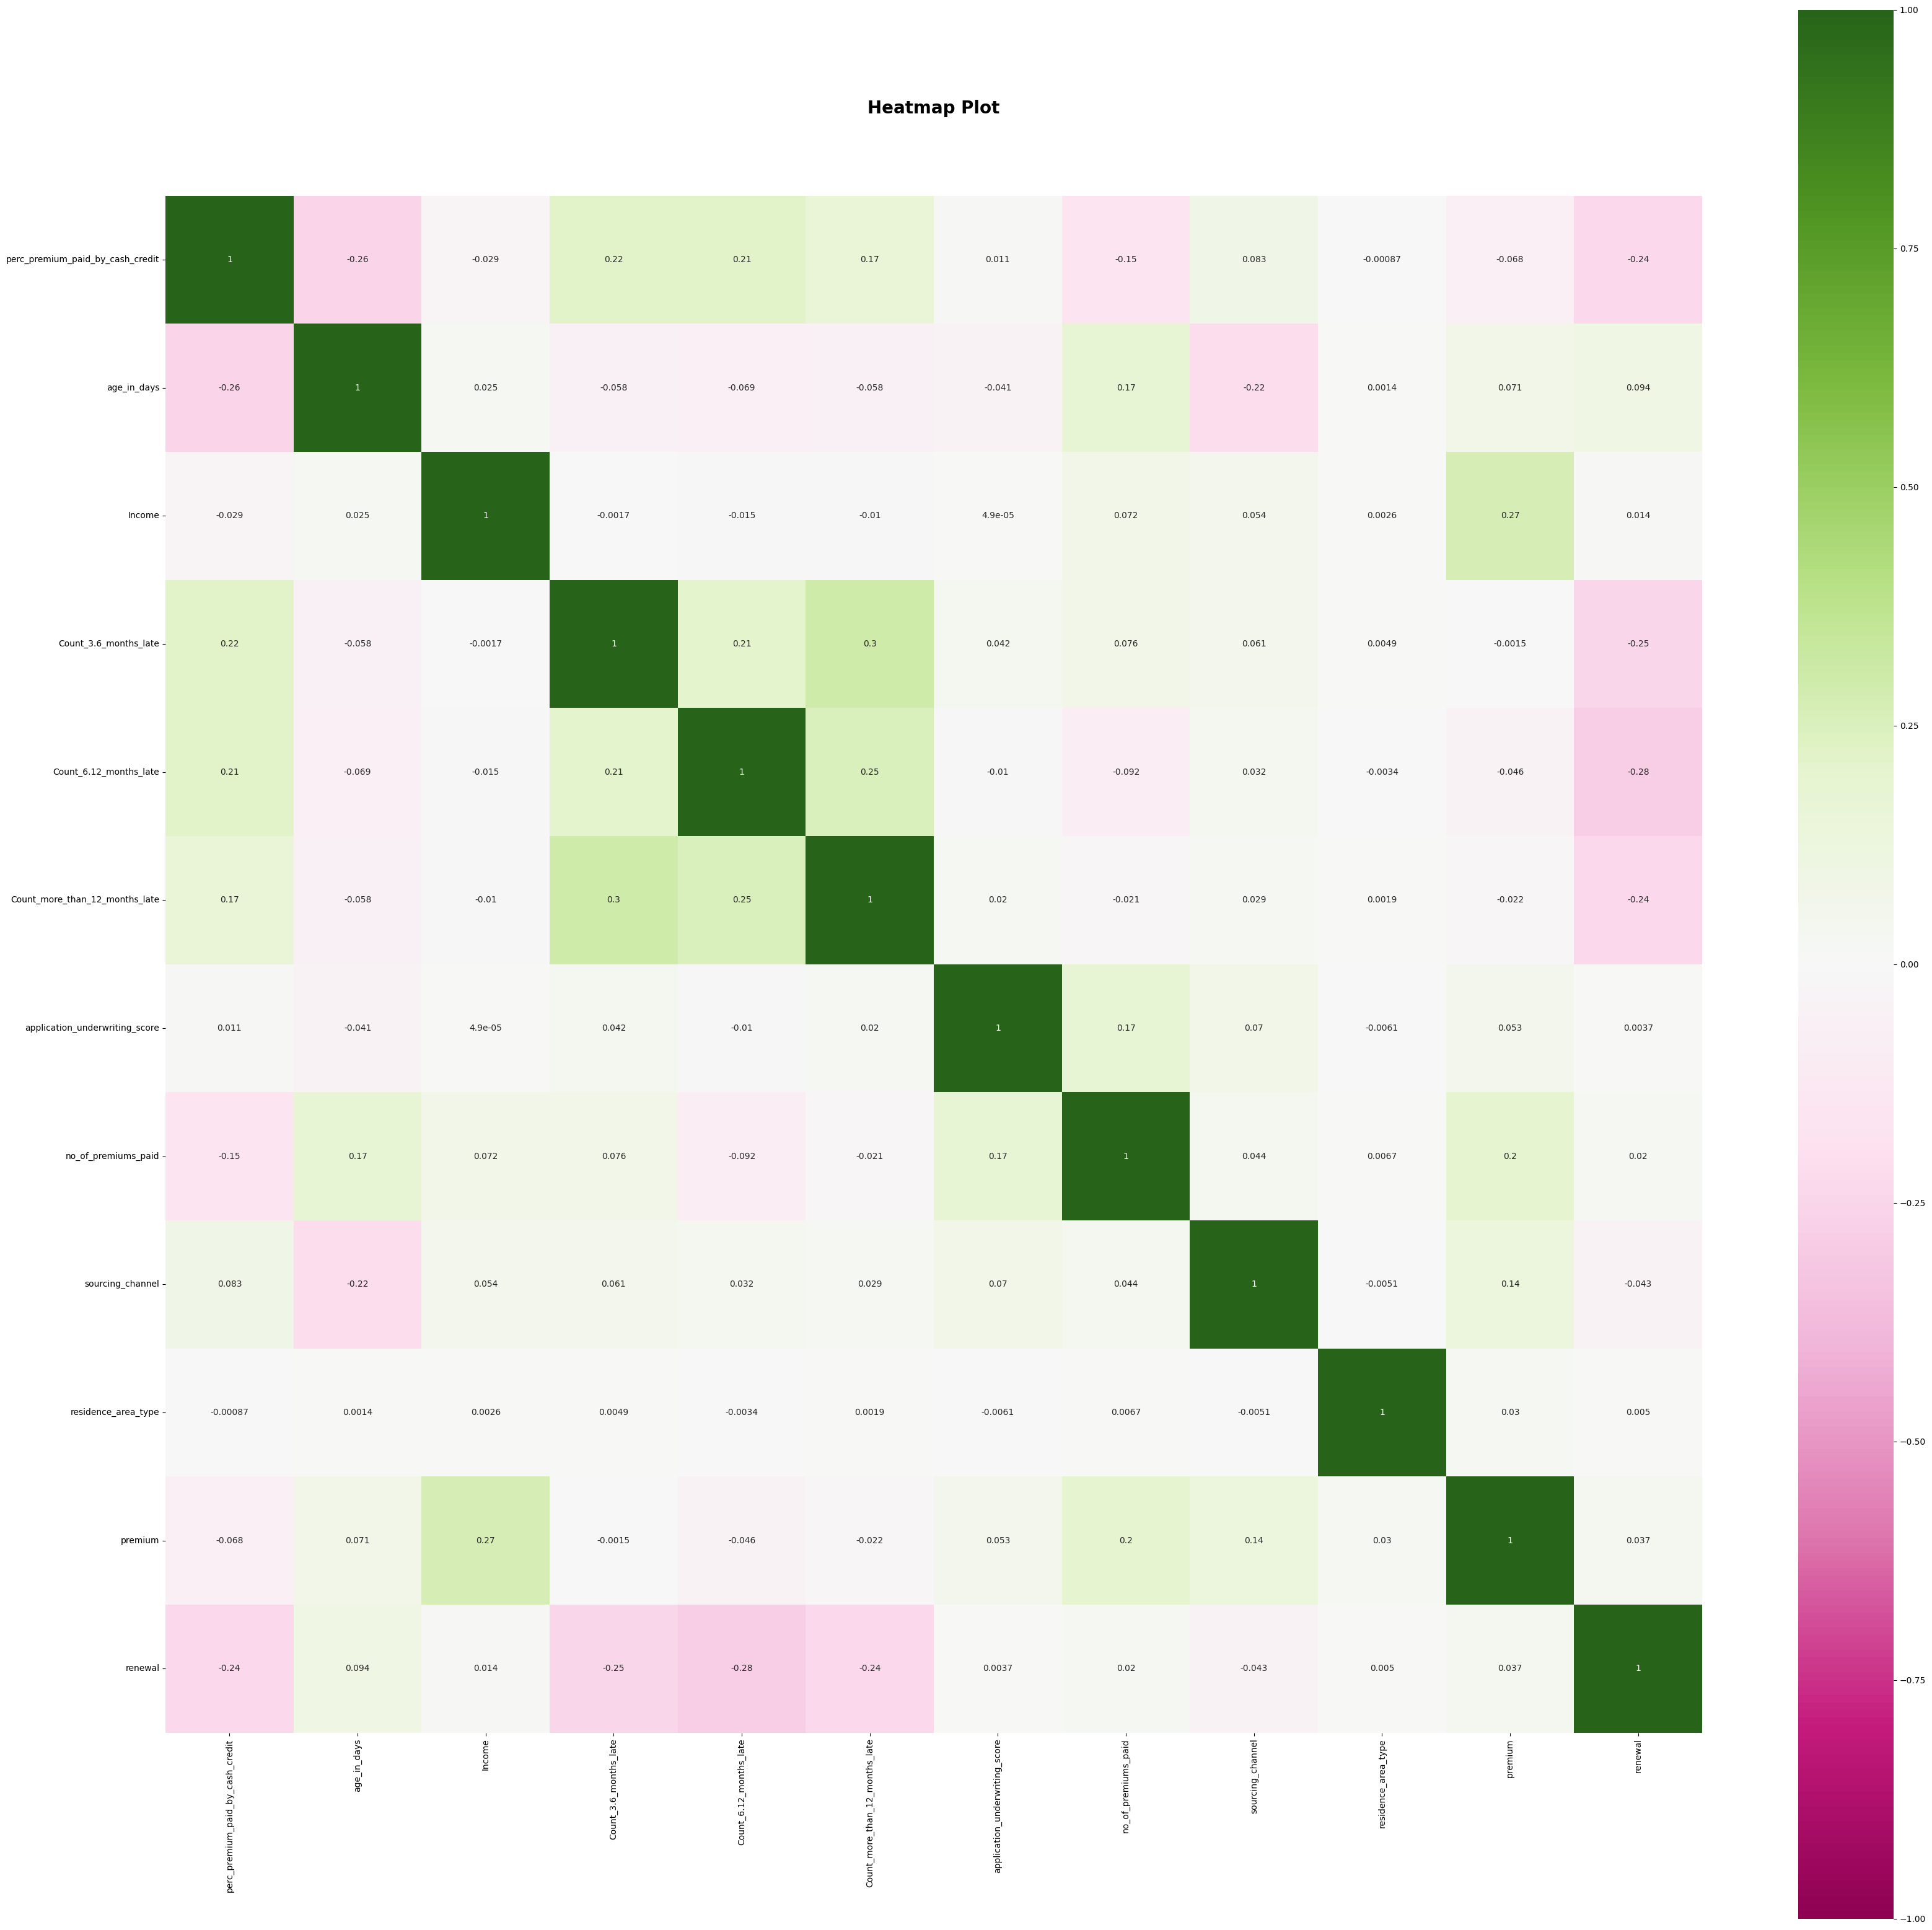

In [7]:
plt.figure(figsize=(40,40))
sns.heatmap(train_data.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='PiYG',
            annot=True,
            square=True);
plt.title('Heatmap Plot',fontsize=20, fontweight='bold', y=1.05)


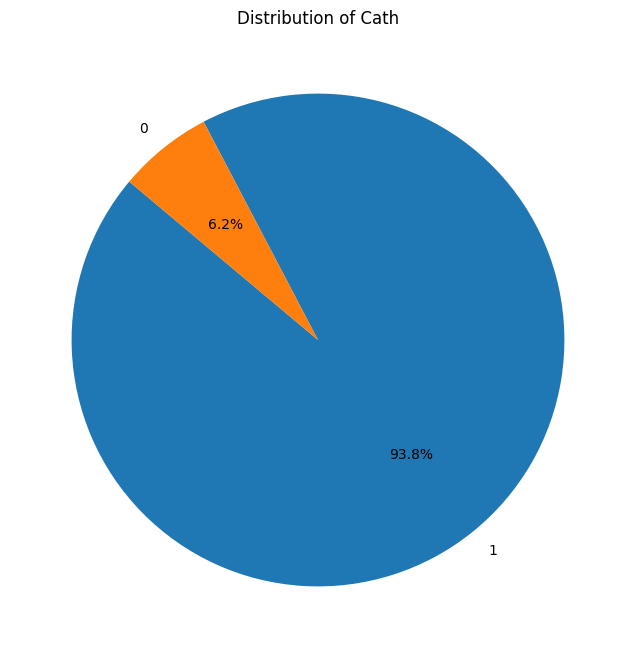

In [8]:
plt.figure(figsize=(8, 8))
plt.pie(train_data['renewal'].value_counts(), labels=train_data['renewal'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cath')
plt.show()

In [9]:
test_data

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3.6_months_late,Count_6.12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,0.052,14973,252030,0.0,0.0,0.0,99.38,12,D,Urban,22200
1,0.628,28117,39360,0.0,0.0,0.0,96.61,11,A,Rural,5700
2,0.458,26290,60860,0.0,0.0,0.0,99.51,6,B,Rural,1200
3,1.000,11688,66130,0.0,0.0,0.0,98.58,7,B,Urban,7500
4,0.190,25557,150140,0.0,0.0,0.0,98.48,20,B,Urban,11700
...,...,...,...,...,...,...,...,...,...,...,...
26612,0.979,14249,262590,0.0,0.0,0.0,97.24,14,A,Urban,18000
26613,0.985,12784,171700,5.0,1.0,1.0,99.49,7,E,Urban,9600
26614,0.019,21909,153790,0.0,0.0,0.0,98.74,11,A,Rural,7500
26615,0.178,13155,195150,0.0,0.0,0.0,98.90,13,D,Rural,7500


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26617 entries, 0 to 26616
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  26617 non-null  float64
 1   age_in_days                       26617 non-null  int64  
 2   Income                            26617 non-null  int64  
 3   Count_3.6_months_late             26584 non-null  float64
 4   Count_6.12_months_late            26584 non-null  float64
 5   Count_more_than_12_months_late    26584 non-null  float64
 6   application_underwriting_score    25619 non-null  float64
 7   no_of_premiums_paid               26617 non-null  int64  
 8   sourcing_channel                  26617 non-null  object 
 9   residence_area_type               26617 non-null  object 
 10  premium                           26617 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 2.2+ MB


In [11]:
test_data.dtypes

perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3.6_months_late               float64
Count_6.12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
premium                               int64
dtype: object

In [14]:
test_data.isnull().sum()

perc_premium_paid_by_cash_credit      0
age_in_days                           0
Income                                0
Count_3.6_months_late                33
Count_6.12_months_late               33
Count_more_than_12_months_late       33
application_underwriting_score      998
no_of_premiums_paid                   0
sourcing_channel                      0
residence_area_type                   0
premium                               0
dtype: int64

In [15]:

label_encoder = LabelEncoder()

object_cols = test_data.select_dtypes(include=['object']).columns

# تبدیل هر ستون object به مقادیر عددی
for col in object_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col])

test_data


,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3.6_months_late,Count_6.12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,0.052,14973,252030,0.0,0.0,0.0,99.38,12,3,1,22200
1,0.628,28117,39360,0.0,0.0,0.0,96.61,11,0,0,5700
2,0.458,26290,60860,0.0,0.0,0.0,99.51,6,1,0,1200
3,1.000,11688,66130,0.0,0.0,0.0,98.58,7,1,1,7500
4,0.190,25557,150140,0.0,0.0,0.0,98.48,20,1,1,11700
...,...,...,...,...,...,...,...,...,...,...,...
26612,0.979,14249,262590,0.0,0.0,0.0,97.24,14,0,1,18000
26613,0.985,12784,171700,5.0,1.0,1.0,99.49,7,4,1,9600
26614,0.019,21909,153790,0.0,0.0,0.0,98.74,11,0,0,7500
26615,0.178,13155,195150,0.0,0.0,0.0,98.90,13,3,0,7500


In [16]:
test_data=test_data.fillna(0)

In [17]:
X_train = train_data.drop('renewal', axis=1)
y_train = train_data['renewal']


In [18]:

X_test = test_data


In [26]:

scaler = StandardScaler()

X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)


In [27]:

# ایجاد مدل
model = LogisticRegression()

# آموزش مدل
model.fit(X_train_standardized, y_train)


LogisticRegression()

In [28]:

# پیش‌بینی با مدل
y_pred = model.predict(X_test_standardized)


In [29]:

# انجام Cross-Validation با 5 فولد
scores = cross_val_score(model, X_train_standardized, y_train, cv=5)

# میانگین و انحراف معیار دقت
print(f'Cross-Validation Accuracy: {scores.mean()} ± {scores.std()}')


Cross-Validation Accuracy: 0.9398902820708288 ± 0.0008722081302144426


In [30]:

# تقسیم داده‌های آموزشی به دو بخش train و validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# آموزش مدل روی داده‌های train_split
model.fit(X_train_split, y_train_split)

# پیش‌بینی روی داده‌های validation
y_val_pred = model.predict(X_val)

# ارزیابی مدل با داده‌های validation
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy}')
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 0.9350112697220135
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       692
           1       0.94      1.00      0.97      9956

    accuracy                           0.94     10648
   macro avg       0.47      0.50      0.48     10648
weighted avg       0.87      0.94      0.90     10648



C:\Users\omid\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\omid\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\omid\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
user_inputs = {
    'perc_premium_paid_by_cash_credit': float(input("Please enter the percentage of premium paid by cash or credit:")),
    'age_in_days': float(input("Please enter the age of the customer in days:")),
    'Income': float(input("Please enter the income of the customer:")),
    'Count_3.6_months_late': float(input("Please enter the number of times the customer was late by 3 to 6 months:")),
    'Count_6.12_months_late': float(input("Please enter the number of times the customer was late by 6 to 12 months:")),
    'Count_more_than_12_months_late': float(input("Please enter the number of times the customer was late by more than 12 months:")),
    'application_underwriting_score': float(input("Please enter the application underwriting score:")),
    'no_of_premiums_paid': float(input("Please enter the number of premiums paid:")),
    'sourcing_channel': float(input("Please enter the sourcing channel (e.g., 1 for Channel A, 2 for Channel B):")),
    'residence_area_type': float(input("Please enter the type of residence area (e.g., 1 for Urban, 2 for Rural):")),
    'premium': float(input("Please enter the premium amount:")),
}


In [34]:
# تبدیل ورودی کاربر به DataFrame
user_input_df = pd.DataFrame(data=[user_inputs])

# تطابق نام‌ها و ترتیب ستون‌ها با داده‌های آموزشی
X_train = train_data.drop('renewal', axis=1)  # فرض کنید target نام ستون هدف است
user_input_df = user_input_df[X_train.columns]

# مقیاس‌بندی ورودی کاربر
user_input_scaled = scaler.transform(user_input_df)

# تبدیل آرایه مقیاس‌بندی شده به DataFrame
user_input_df_scaled = pd.DataFrame(data=user_input_scaled, columns=X_train.columns)

# پیش‌بینی بر روی ورودی کاربر
prediction = model.predict(user_input_df_scaled)



In [36]:
if prediction == 1:
    print('The insurance company is likely to encounter problems with this customer in renewing their insurance policy.')
else:
    print('The insurance company is unlikely to encounter problems with this customer in renewing their insurance policy.')


The insurance company is likely to encounter problems with this customer in renewing their insurance policy.
